
# Support Vectore Machines Step 1 - Hard-Margin SVM

## Read the csv file and convert the data into Numpy array

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.recfromcsv("haberman.csv", names=None)
x = data[:,0:3]
t = data[:,3]

## Visualize the data in 3d space

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(data, columns=["Age", "Year", "PAD", "Class"])
fig = px.scatter_3d(df, x=df.Age, y=df.Year, z=df.PAD, color=df.Class, symbol=df.Class)
fig.update_traces(marker_size=2)
fig.update_traces(marker_color=1)
fig.update_coloraxes(showscale=False)
fig.update_layout(legend_itemsizing="constant")
fig.show()

## Define class SVM

In [ ]:
class SVM:
  
  def __init__(self, learning_rate=0.001, lambda_param=100, n_epochs=100):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_epochs = n_epochs
    self.w = None
    self.b = None
    self.errors = []
    self.accuracy = []

  def error_func(self, X):
    error = 1/2*self.lambda_param*np.linalg.norm(self.w)**2 + np.sum(np.dot(X, self.w) + self.b)
    return error

  def predict(self, x_i):
    pred= np.dot(x_i, self.w) + self.b
    return np.sign(pred)

      

  def fit(self, X, y):
    n_samples, n_features = X.shape
        
    y_ = np.where(y == 1, -1, 1)
        
    self.w = np.zeros(n_features)
    self.b = 0

    for _ in range(self.n_epochs):
      for idx, x_i in enumerate(X):
        condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
        if condition:
          self.w -= self.lr * (2 * self.lambda_param * self.w)
        else:
          self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
          self.b -= self.lr * y_[idx]
        
      error = self.error_func(X)
      self.errors.append(error)
  
  def acc(self,X,y):
    n_samples, n_features = X.shape 
    y_ = np.where(y == 1, -1, 1)
    
    for _ in range(self.n_epochs):
      accuracy_cnt = 0
      for idx, x_i in enumerate(X):
        y = self.predict(x_i)
        if y == y_[idx]:
          accuracy_cnt += 1
      
    
      self.accuracy.append(float(accuracy_cnt/n_samples))


## Invoke training

In [ ]:
svm = SVM(learning_rate=0.001, lambda_param=100, n_epochs=100)
svm.fit(x, t)

## Visualize error history

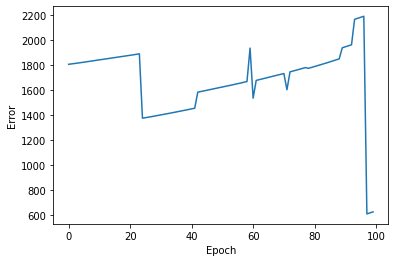

In [ ]:
plt.plot(svm.errors)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

## Visualize accuracy history

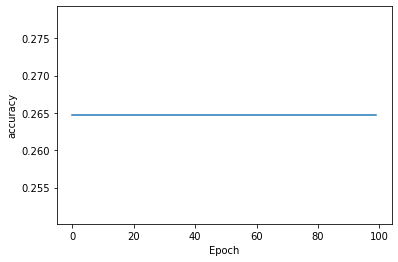

In [ ]:
# TODO: your job - visualize accuracy history according to epoch numbers.
svm.acc(x,t)
plt.plot(svm.accuracy)
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.show()



## Visualize the decision surface

In [ ]:
import plotly.graph_objects as go

x_grid, y_grid = np.meshgrid(np.linspace(30, 80, 10), np.linspace(58, 68, 10))

# TODO: your job - visualize the decision surface obtained from the training
#                  you have to calculate z_grid

z_grid =  (-svm.b-svm.w[0]*x_grid-svm.w[1]*y_grid) / svm.w[2]

df = pd.DataFrame(data, columns=["Age", "Year", "PAD", "Class"])
fig = px.scatter_3d(df, x=df.Age, y=df.Year, z=df.PAD, color=df.Class, symbol=df.Class)
fig.update_traces(marker_size=2)
fig.update_traces(marker_color=1)
fig.update_coloraxes(showscale=False)
fig.update_layout(legend_itemsizing="constant")
fig.add_trace(go.Surface(x=x_grid, y=y_grid, z=z_grid, opacity = 0.9, showscale=False))
fig.show()

